In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from datetime import datetime
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_palette('colorblind')

In [2]:
def histplt(df, text):
    fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharey=True)
    fig.suptitle(text)
    plt.subplots_adjust(hspace = 0.8)
    
    sns.histplot(ax=axes[0,0], data=df, x='DayofWeek',bins=30,kde=True)
    axes[0,0].set_title('Day of the week')

    sns.histplot(ax=axes[0,1],data=df, x='HourofDay', bins=30,kde=True)
    axes[0,1].set_title('Hour of the Day')

    sns.histplot(ax=axes[1,0],data=df,x='Month', bins=30, kde=True)
    axes[1,0].set_title('Month')

    sns.histplot(ax=axes[1,1],data=df,x='ValueOAT', bins=30, kde=True)
    axes[1,1].set_title('Outside air temperature')

    sns.histplot(ax=axes[2,0],data=df,x='ValueRT', bins=30, kde=True)
    axes[2,0].set_title('Room temperature')

    sns.histplot(ax=axes[2,1],data=df,x='ValueST', bins=30, kde=True)
    axes[2,1].set_title('Set point temperature')
    
    sns.histplot(ax=axes[3,0],data=df,x='ValueOAH', bins=30, kde=True)
    axes[3,0].set_title('Outside Air Humidity')
    
    sns.histplot(ax=axes[3,1],data=df,x='STDeviation', bins=30, kde=True)
    axes[3,1].set_title('Set Point & Room Temperature Difference')

In [3]:
def dt(dtstring): 
    x=datetime.strptime(dtstring, '%Y-%m-%d %H:%M:%S')
    return x
#df.dtypes
#df['TimeOMS']=df['TimeOMS'].apply(lambda x: dt(x))
#df['TS']= df['TimeOMS'].apply(lambda x: x.timestamp())

### K Means Clustering

In [4]:
kmeans_noise= pd.read_csv('kmeansnoise3.csv')
kmeans_noise['TimeOMS']=kmeans_noise['TimeOMS'].apply(lambda x: dt(x))
kmeans_normal= pd.read_csv('kmeansnormal3.csv')
kmeans_normal['TimeOMS']=kmeans_normal['TimeOMS'].apply(lambda x: dt(x))

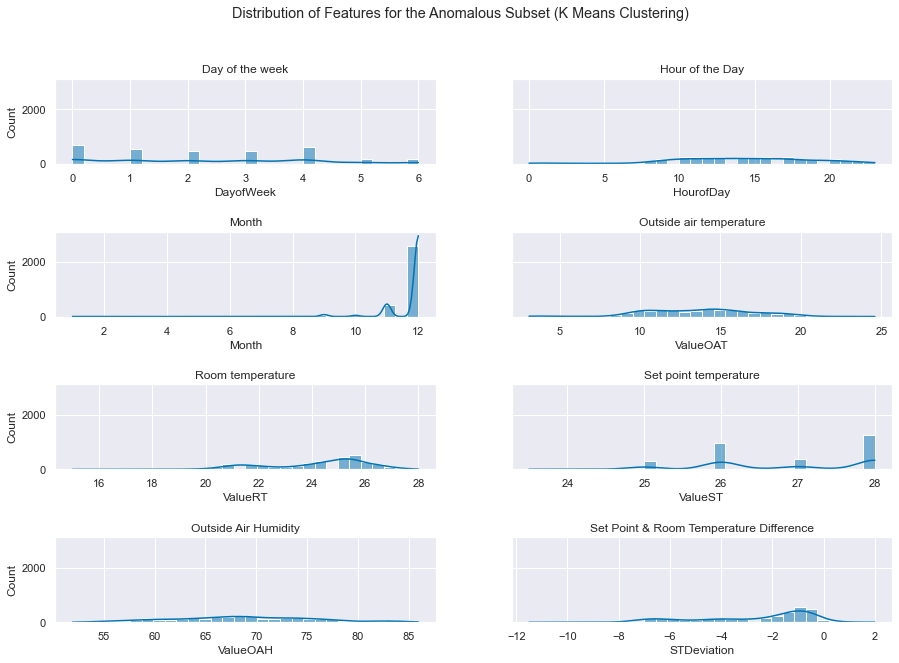

In [5]:
histplt(kmeans_noise, 'Distribution of Features for the Anomalous Subset (K Means Clustering)')

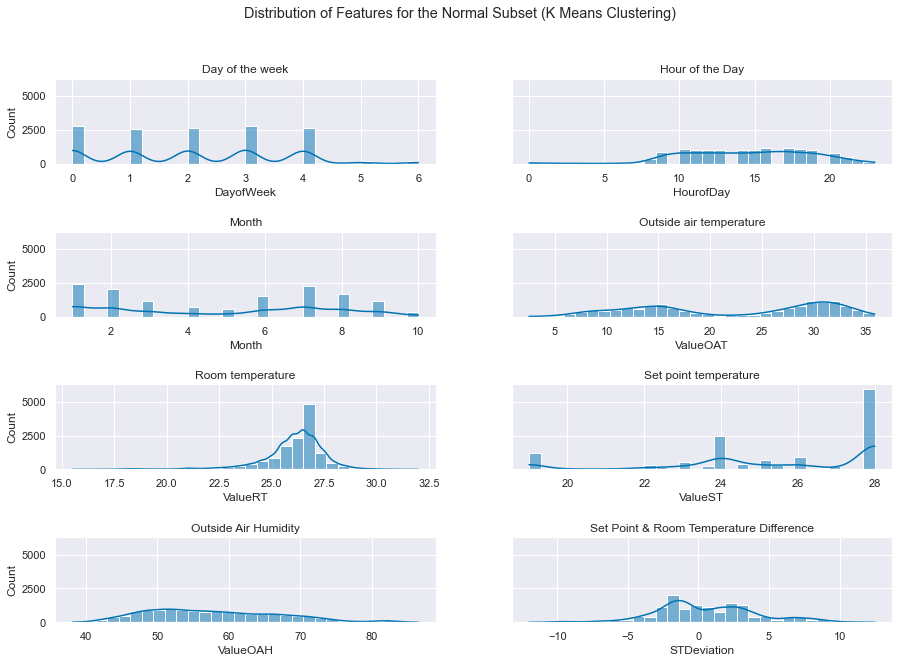

In [6]:
histplt(kmeans_normal, 'Distribution of Features for the Normal Subset (K Means Clustering)')

### DBSCAN 

In [7]:
df_dbnoise= pd.read_csv('dbscan_noise.csv')
df_dbnoise['TimeOMS']=df_dbnoise['TimeOMS'].apply(lambda x: dt(x))
df_dbnormal=pd.read_csv('dbscan_normal.csv')
df_dbnormal['TimeOMS']=df_dbnormal['TimeOMS'].apply(lambda x: dt(x))

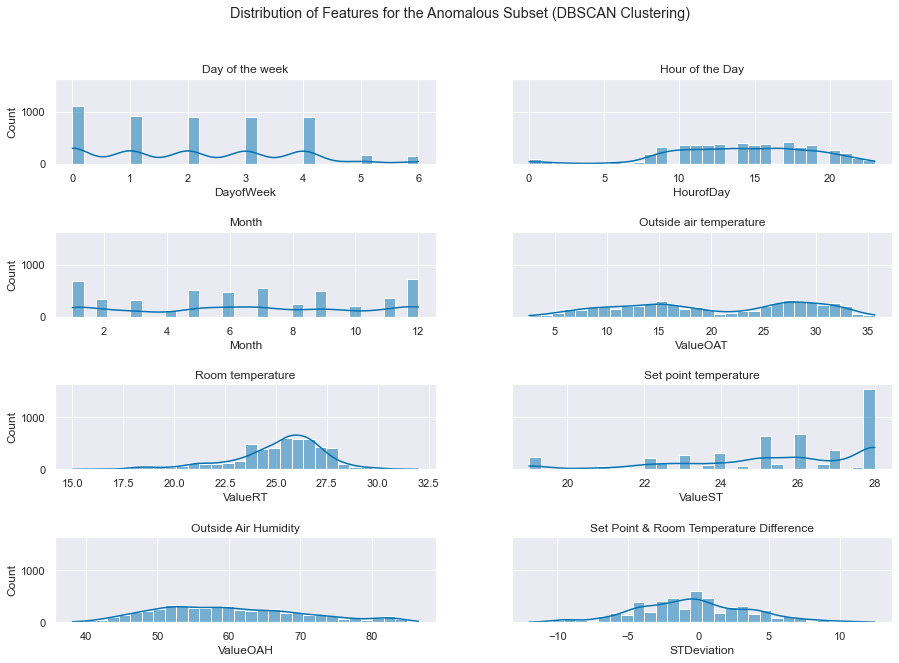

In [8]:
histplt(df_dbnoise, 'Distribution of Features for the Anomalous Subset (DBSCAN Clustering)')

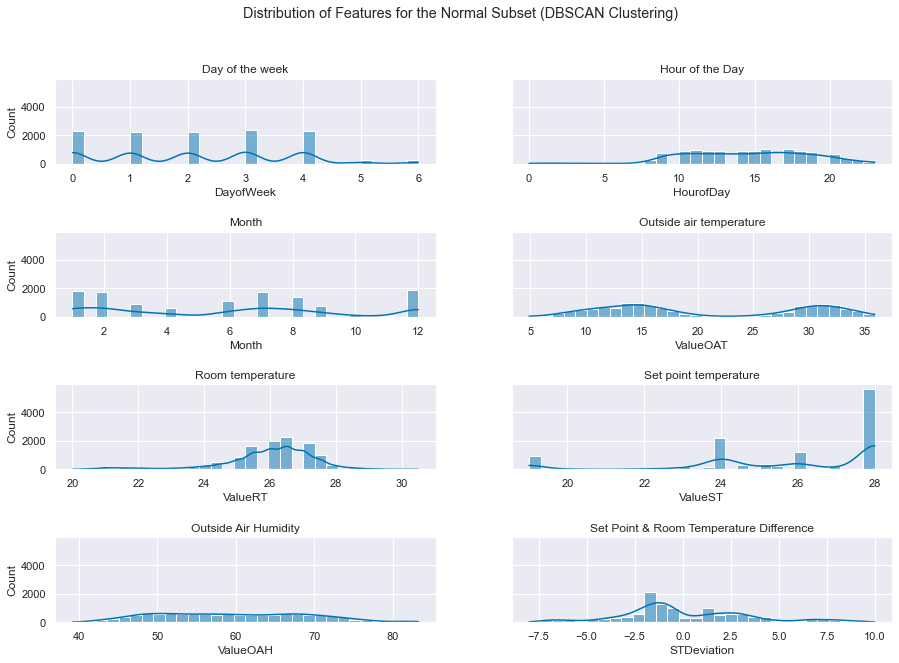

In [9]:
histplt(df_dbnormal, 'Distribution of Features for the Normal Subset (DBSCAN Clustering)')

### LOCAL OUTLIER FACTOR

In [10]:
df_lof=pd.read_csv('lof_anomalies1.csv')
df_lof['TimeOMS']=df_lof['TimeOMS'].apply(lambda x: dt(x))
df_lofnormal=pd.read_csv('lof_normal.csv')
df_lofnormal['TimeOMS']=df_lofnormal['TimeOMS'].apply(lambda x: dt(x))

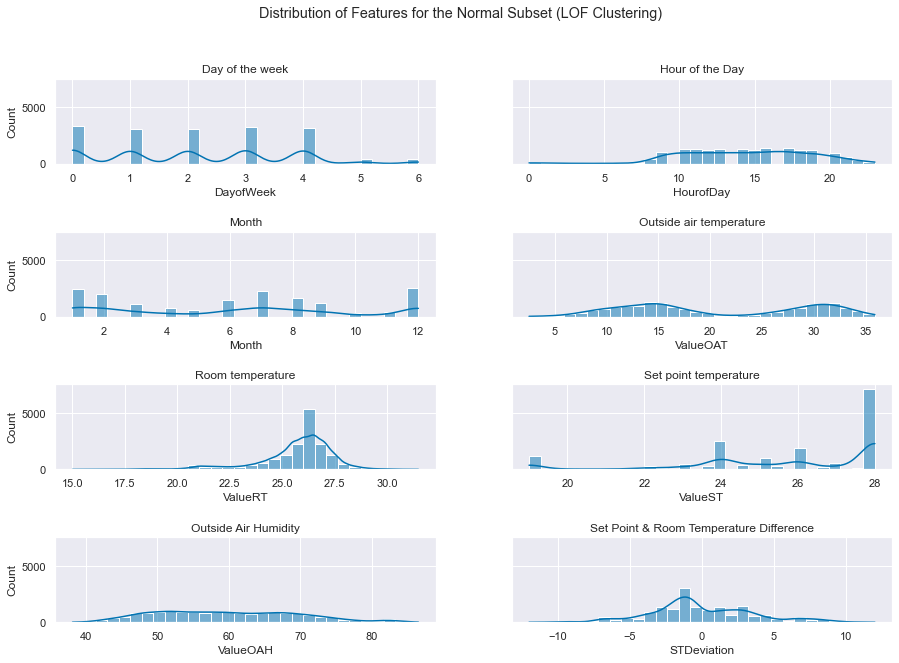

In [11]:
histplt(df_lofnormal, 'Distribution of Features for the Normal Subset (LOF Clustering)')

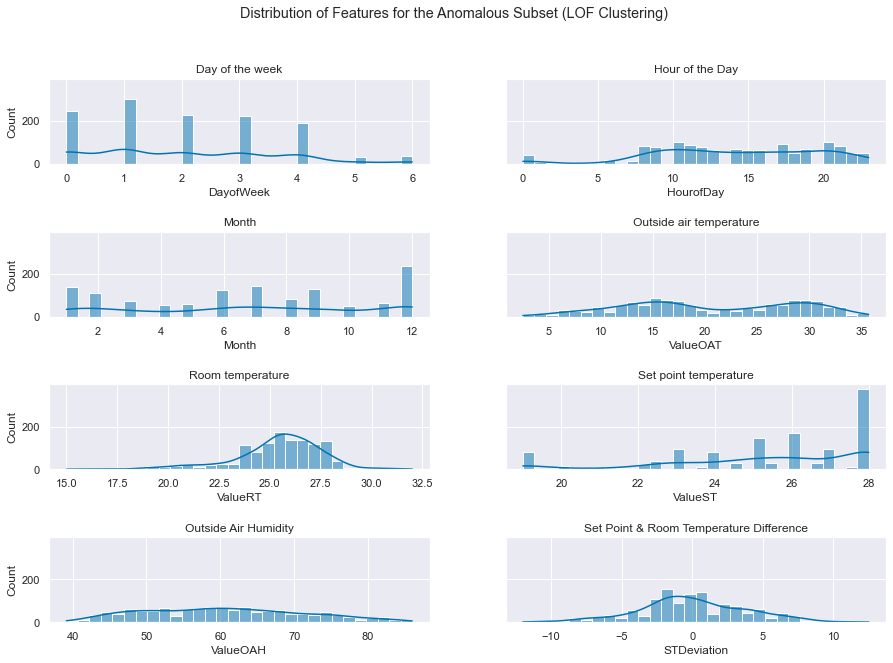

In [12]:
histplt(df_lof, 'Distribution of Features for the Anomalous Subset (LOF Clustering)')

### DBSCAN-LOF Subset

In [13]:
df_dblof_n=pd.read_csv('dblof_anomalies1.csv')
df_dblof_n['TimeOMS']=df_dblof_n['TimeOMS'].apply(lambda x: dt(x))

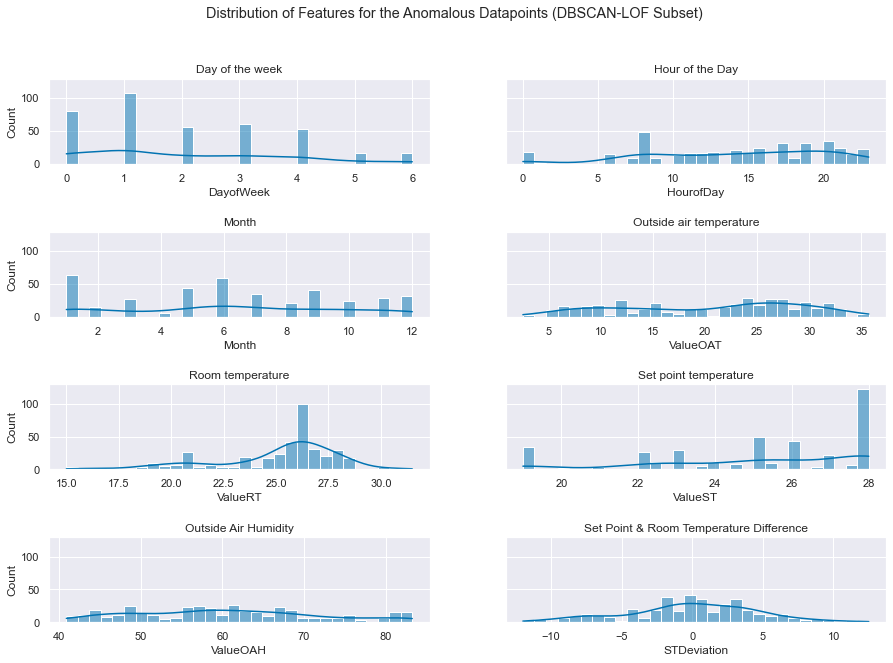

In [14]:
histplt(df_dblof_n, 'Distribution of Features for the Anomalous Datapoints (DBSCAN-LOF Subset)')

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDeviation'>

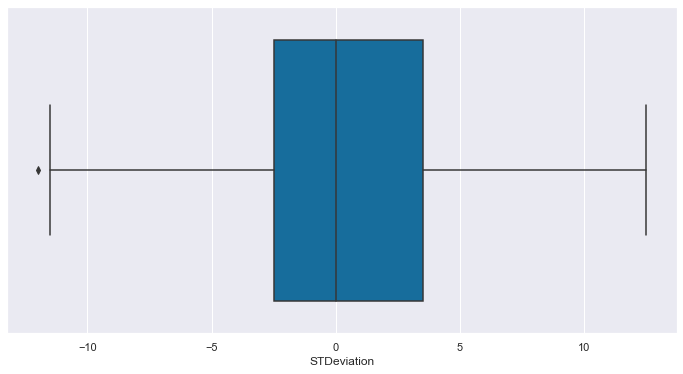

In [51]:
sns.boxplot(df_dblof_n['STDeviation'])


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ValueRT'>

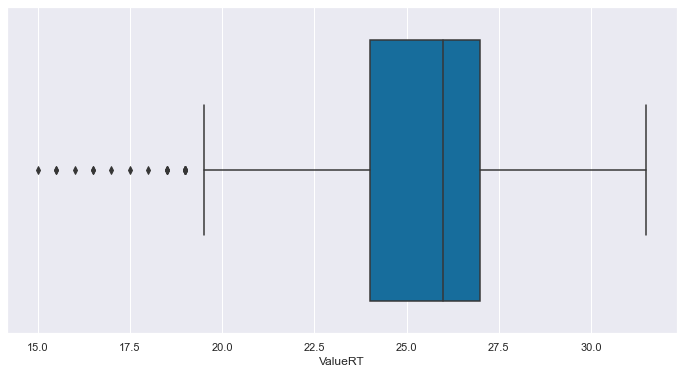

In [52]:
sns.boxplot(df_dblof_n['ValueRT'])

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ValueST'>

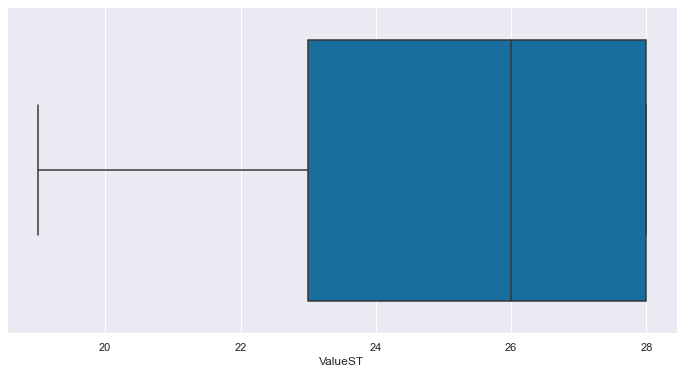

In [53]:
sns.boxplot(df_dblof_n['ValueST'])

In [54]:
df_dblof_n.describe()

,Unnamed: 0,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,DBScanCluster,LOF
count,388.000000,388.000000,388.0,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,3.880000e+02,388.0,388.000000
mean,5732.072165,1.435567,1.0,25.101804,25.162371,20.403093,0.757732,-0.060567,0.162371,4.698711,60.514961,14.304124,6.268041,2018.502577,2.025773,2.603093,1.545787e+09,-1.0,-1.344937
std,4395.829056,0.496471,0.0,2.919342,2.813667,8.608312,0.429009,4.677680,0.369267,7.285849,11.281740,5.973264,3.504196,0.572851,1.682669,1.091281,1.505602e+07,0.0,0.197875
min,104.000000,1.000000,1.0,15.000000,19.000000,2.500000,0.000000,-12.000000,0.000000,-9.400000,40.925000,0.000000,1.000000,2017.000000,0.000000,1.000000,1.513772e+09,-1.0,-3.331794
25%,2389.750000,1.000000,1.0,24.000000,23.000000,12.200000,1.000000,-2.500000,0.000000,-0.500000,50.772500,9.000000,3.000000,2018.000000,1.000000,2.000000,1.534466e+09,-1.0,-1.374935
50%,4225.500000,1.000000,1.0,26.000000,26.000000,22.700000,1.000000,0.000000,0.000000,3.200000,59.710000,15.000000,6.000000,2018.000000,2.000000,3.000000,1.544431e+09,-1.0,-1.288892
75%,8821.000000,2.000000,1.0,27.000000,28.000000,27.500000,1.000000,3.500000,0.000000,10.400000,67.705000,19.000000,9.000000,2019.000000,3.000000,4.000000,1.554020e+09,-1.0,-1.237934
max,16926.000000,2.000000,1.0,31.500000,28.000000,35.700000,1.000000,12.500000,1.000000,19.400000,83.240000,23.000000,12.000000,2020.000000,6.000000,4.000000,1.582213e+09,-1.0,-1.200132


In [55]:
df_dblof_n['STDeviation'].value_counts()

 3.5     27
-0.5     21
 0.5     20
 0.0     20
 4.0     19
-1.5     19
-2.0     19
-1.0     17
 2.5     17
 1.0     16
 1.5     15
-4.5     14
-7.5     12
 2.0     11
-2.5     11
-7.0     11
 5.5      9
 5.0      9
 3.0      8
-3.0      7
 6.0      7
-6.0      7
-3.5      6
-4.0      6
-8.0      6
 6.5      5
 7.5      5
-9.0      4
-8.5      4
 8.0      3
 9.5      3
 4.5      3
-9.5      3
 9.0      3
-10.5     3
 11.5     2
-11.5     2
-5.0      2
 7.0      2
-11.0     2
 8.5      2
 11.0     1
-12.0     1
-5.5      1
-10.0     1
 12.5     1
 12.0     1
Name: STDeviation, dtype: int64

### Common Indices DF (DBSCAN-LOF)

In [15]:
df_dblof_idx=pd.read_csv('dbscan-lof-common.csv')
df_dblof_idx['TimeOMS']=df_dblof_idx['TimeOMS'].apply(lambda x: dt(x))

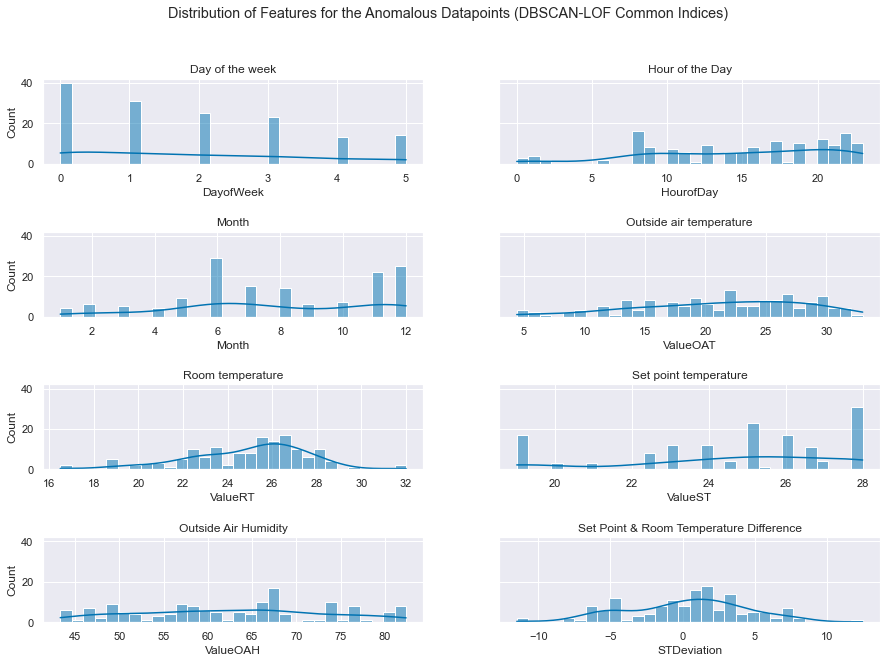

In [16]:
histplt(df_dblof_idx, 'Distribution of Features for the Anomalous Datapoints (DBSCAN-LOF Common Indices)')

### Contextual Data 


In [17]:
df_normal=pd.read_csv('normal.csv')
df_normal['TimeOMS']=df_normal['TimeOMS'].apply(lambda x: dt(x))
df_anomalous=pd.read_csv('anomalous.csv')
df_anomalous['TimeOMS']=df_anomalous['TimeOMS'].apply(lambda x: dt(x))

In [18]:
(df_normal['STDeviation']==0).value_counts()

False    4041
True      563
Name: STDeviation, dtype: int64

In [19]:
(df_normal['STDeviation']).value_counts()

-1.0    1541
-0.5    1341
 1.0     618
 0.0     563
 0.5     541
Name: STDeviation, dtype: int64

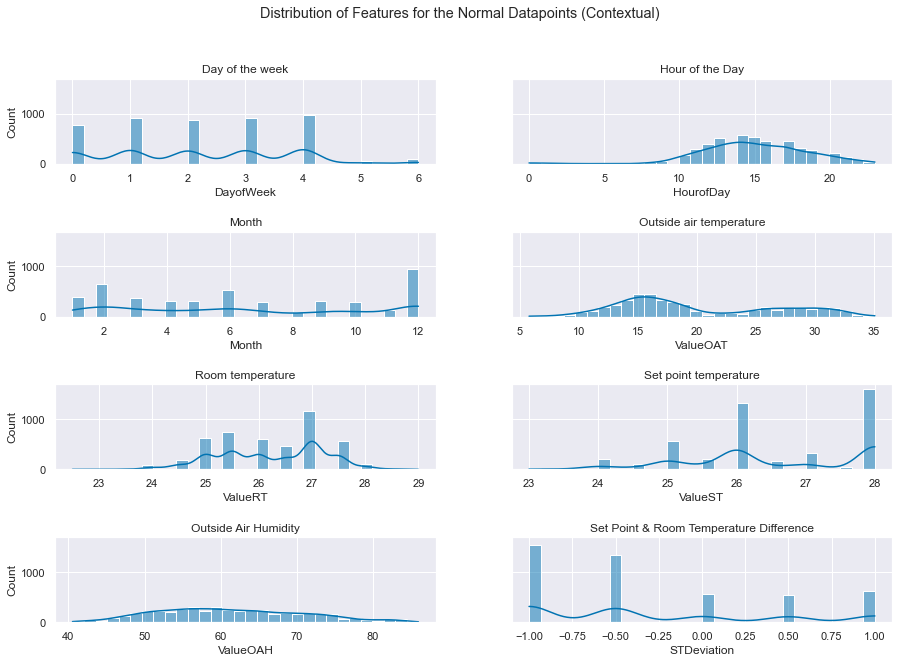

In [20]:
histplt(df_normal, 'Distribution of Features for the Normal Datapoints (Contextual)')

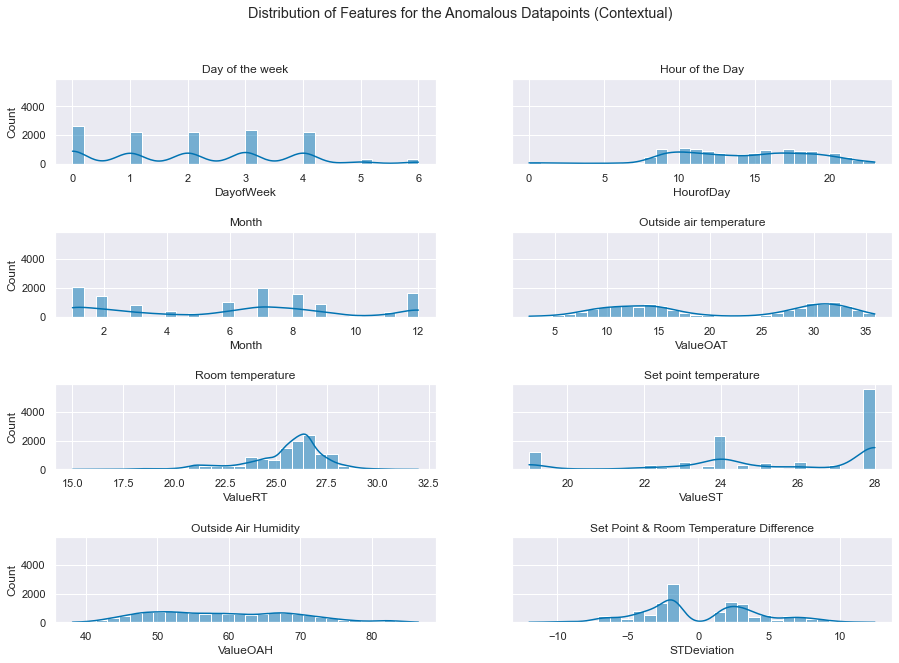

In [21]:
histplt(df_anomalous, 'Distribution of Features for the Anomalous Datapoints (Contextual)')

### Scatter Plots

In [22]:
def scatterplt(df, xax,yax,hue1):
    fig, ax = plt.subplots(figsize = (10,4))
    ax = sns.scatterplot(x = xax, y = yax,data=df, hue=hue1, palette='colorblind')
    ttl= yax + " VS " + xax
    plt.title(ttl)
    plt.show()
    #sns.color_palette(palette='dark')

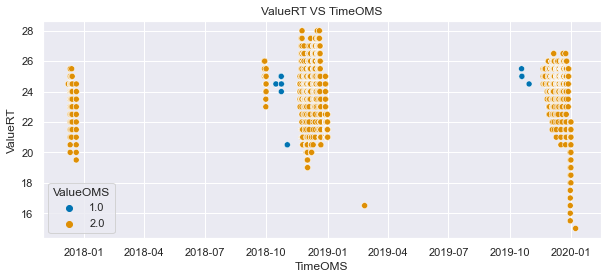

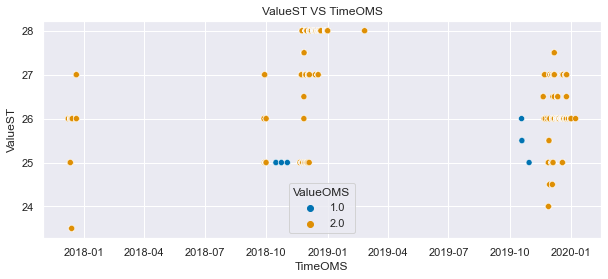

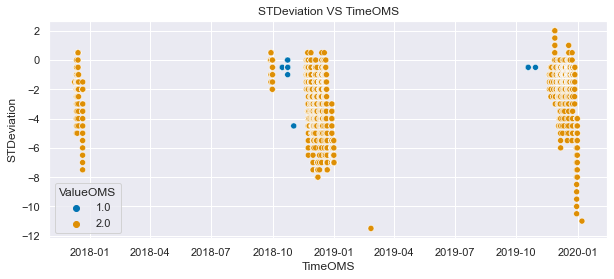

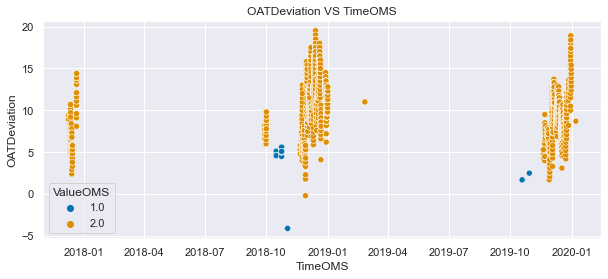

In [23]:
#DBScan_noise
scatterplt(kmeans_noise, 'TimeOMS', 'ValueRT', 'ValueOMS')

#DBScan normal
scatterplt(kmeans_noise, 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(kmeans_noise, 'TimeOMS', 'STDeviation', 'ValueOMS')
#LOF noise
scatterplt(kmeans_noise, 'TimeOMS', 'OATDeviation', 'ValueOMS')


### DBSCAN

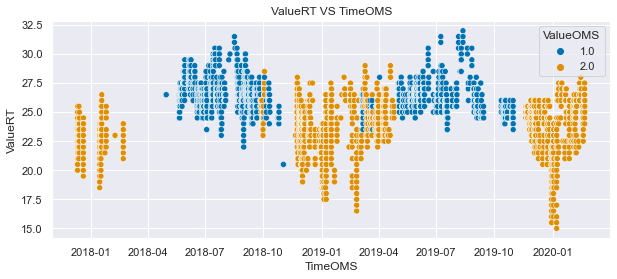

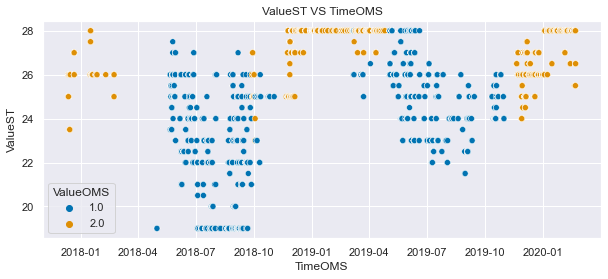

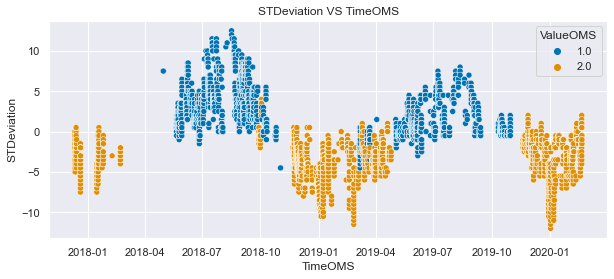

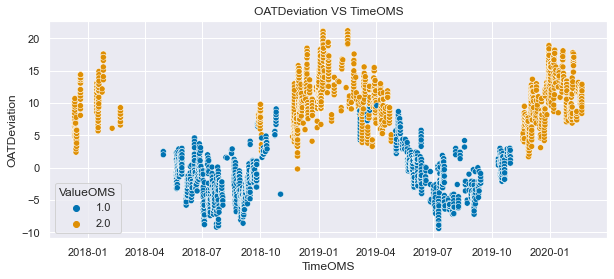

In [24]:

scatterplt(df_dbnoise, 'TimeOMS', 'ValueRT', 'ValueOMS')
scatterplt(df_dbnoise, 'TimeOMS', 'ValueST', 'ValueOMS')
scatterplt(df_dbnoise, 'TimeOMS', 'STDeviation', 'ValueOMS')
scatterplt(df_dbnoise, 'TimeOMS', 'OATDeviation', 'ValueOMS')


### Local Outlier Factor

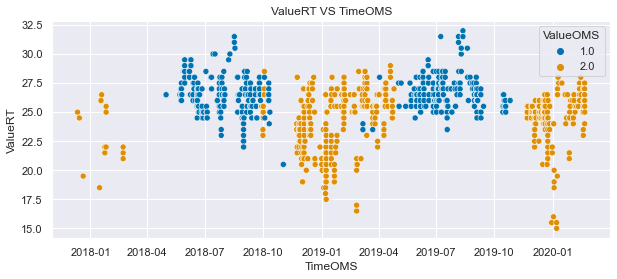

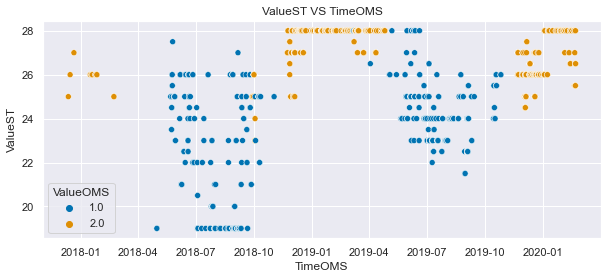

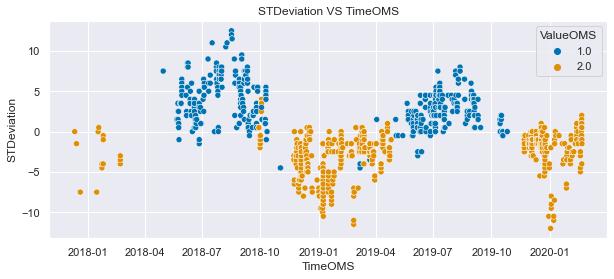

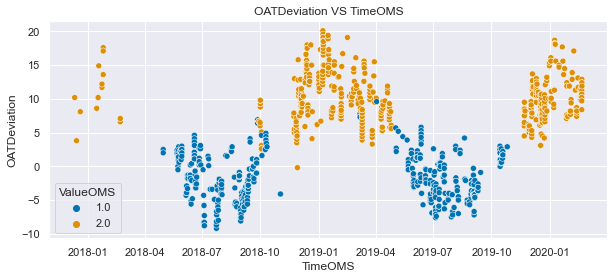

In [25]:
scatterplt(df_lof, 'TimeOMS', 'ValueRT', 'ValueOMS')

scatterplt(df_lof, 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(df_lof, 'TimeOMS', 'STDeviation', 'ValueOMS')

scatterplt(df_lof, 'TimeOMS', 'OATDeviation', 'ValueOMS')


### DBSCAN-LOF subset

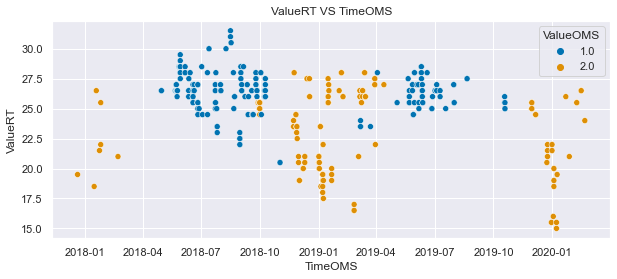

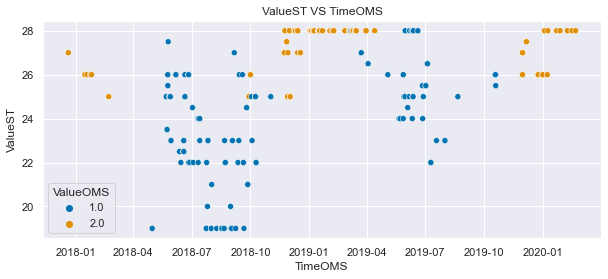

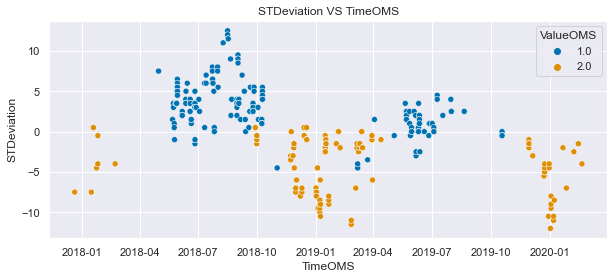

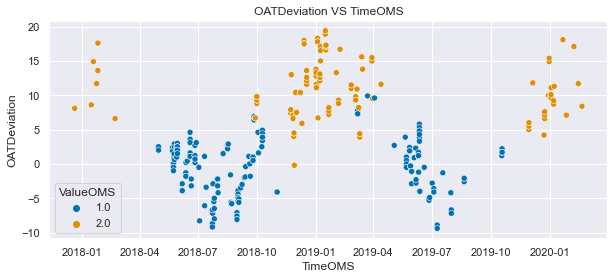

In [26]:
scatterplt(df_dblof_n, 'TimeOMS', 'ValueRT', 'ValueOMS')

scatterplt(df_dblof_n, 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(df_dblof_n, 'TimeOMS', 'STDeviation', 'ValueOMS')

scatterplt(df_dblof_n, 'TimeOMS', 'OATDeviation', 'ValueOMS')

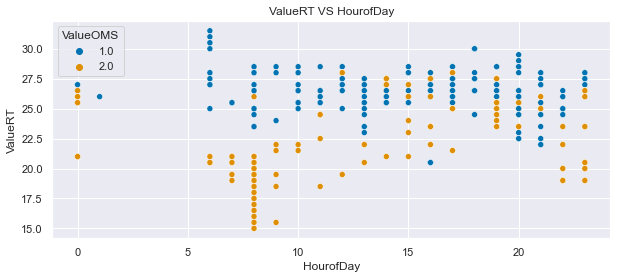

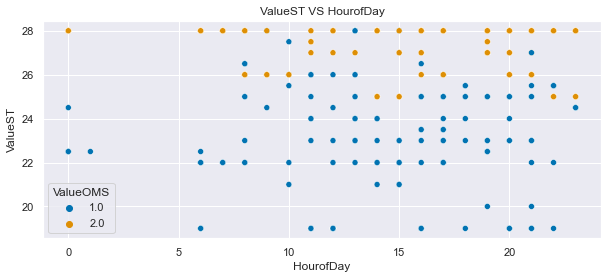

In [27]:
scatterplt(df_dblof_n, 'HourofDay', 'ValueRT', 'ValueOMS')

scatterplt(df_dblof_n, 'HourofDay', 'ValueST', 'ValueOMS')

### DBSCAN-LOF indices

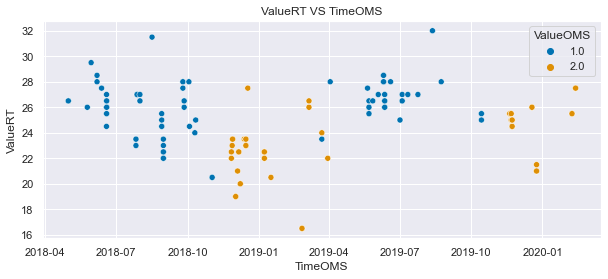

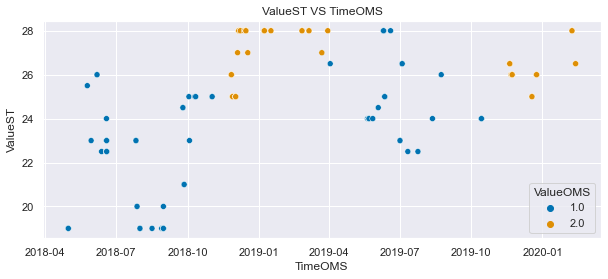

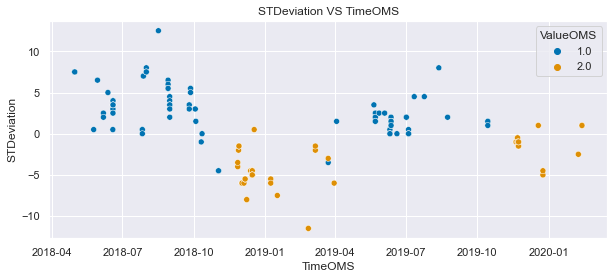

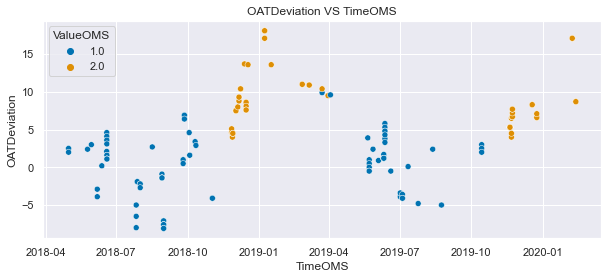

In [28]:
scatterplt(df_dblof_idx, 'TimeOMS', 'ValueRT', 'ValueOMS')

scatterplt(df_dblof_idx, 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(df_dblof_idx, 'TimeOMS', 'STDeviation', 'ValueOMS')

scatterplt(df_dblof_idx, 'TimeOMS', 'OATDeviation', 'ValueOMS')

### More Histograms 

In [29]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Text(0.5, 1.0, 'Set point temperature (Common Indices)')

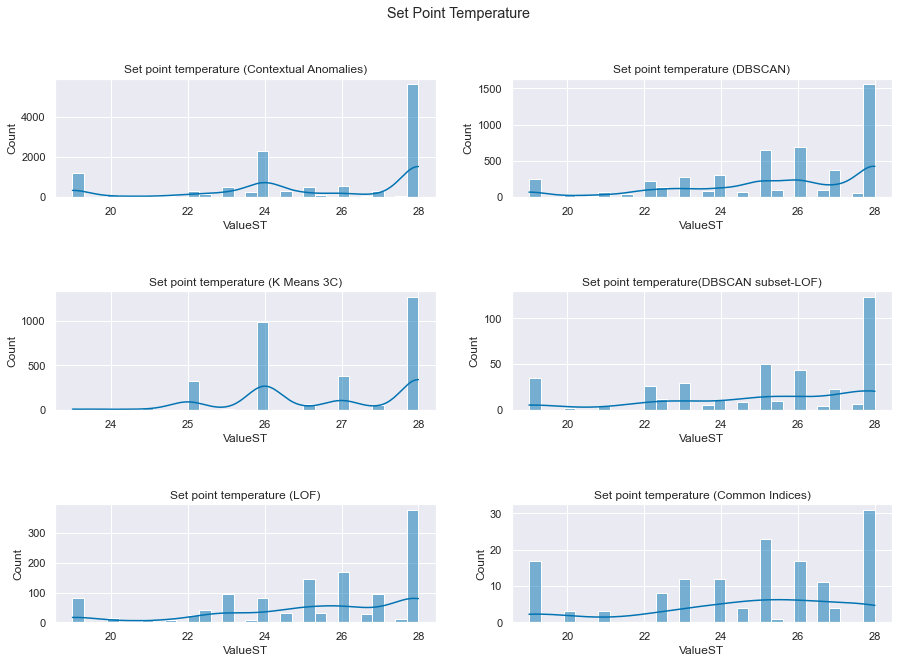

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharey=False)
fig.suptitle('Set Point Temperature ')
plt.subplots_adjust(hspace = 0.8)

sns.histplot(ax=axes[0,0], data=df_anomalous, x='ValueST',bins=30,kde=True)
axes[0,0].set_title('Set point temperature (Contextual Anomalies)')

sns.histplot(ax=axes[0,1],data=df_dbnoise, x='ValueST', bins=30,kde=True)
axes[0,1].set_title('Set point temperature (DBSCAN)')

sns.histplot(ax=axes[1,0],data=kmeans_noise,x='ValueST', bins=30, kde=True)
axes[1,0].set_title('Set point temperature (K Means 3C)')

sns.histplot(ax=axes[1,1],data=df_dblof_n,x='ValueST', bins=30, kde=True)
axes[1,1].set_title('Set point temperature(DBSCAN subset-LOF)')

sns.histplot(ax=axes[2,0],data=df_lof,x='ValueST', bins=30, kde=True)
axes[2,0].set_title('Set point temperature (LOF)')

sns.histplot(ax=axes[2,1],data=df_dblof_idx,x='ValueST', bins=30, kde=True)
axes[2,1].set_title('Set point temperature (Common Indices)')



Text(0.5, 1.0, 'Common Indices')

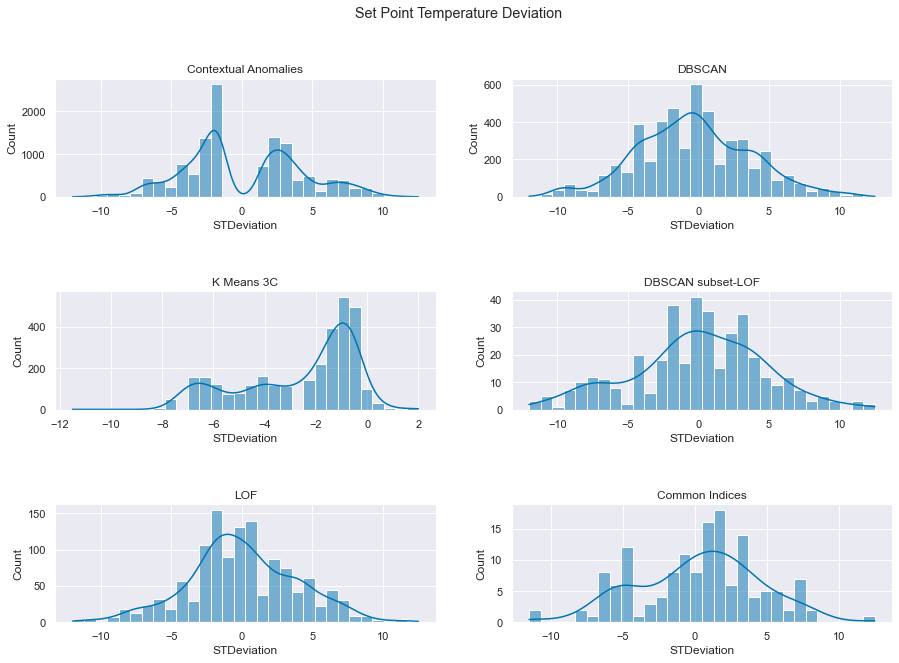

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharey=False)
fig.suptitle('Set Point Temperature Deviation ')
plt.subplots_adjust(hspace = 0.8)

sns.histplot(ax=axes[0,0], data=df_anomalous, x='STDeviation',bins=30,kde=True)
axes[0,0].set_title('Contextual Anomalies')

sns.histplot(ax=axes[0,1],data=df_dbnoise, x='STDeviation', bins=30,kde=True)
axes[0,1].set_title('DBSCAN')

sns.histplot(ax=axes[1,0],data=kmeans_noise,x='STDeviation', bins=30, kde=True)
axes[1,0].set_title('K Means 3C')

sns.histplot(ax=axes[1,1],data=df_dblof_n,x='STDeviation', bins=30, kde=True)
axes[1,1].set_title('DBSCAN subset-LOF')

sns.histplot(ax=axes[2,0],data=df_lof,x='STDeviation', bins=30, kde=True)
axes[2,0].set_title('LOF')

sns.histplot(ax=axes[2,1],data=df_dblof_idx,x='STDeviation', bins=30, kde=True)
axes[2,1].set_title('Common Indices')


Text(0.5, 1.0, 'Common Indices')

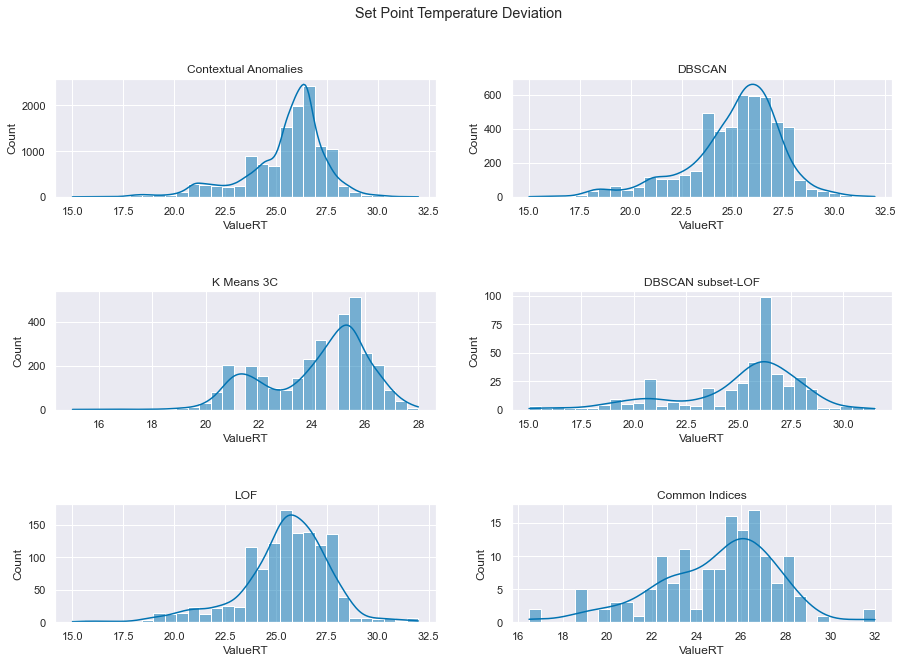

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharey=False)
fig.suptitle('Set Point Temperature Deviation ')
plt.subplots_adjust(hspace = 0.8)

sns.histplot(ax=axes[0,0], data=df_anomalous, x='ValueRT',bins=30,kde=True)
axes[0,0].set_title('Contextual Anomalies')

sns.histplot(ax=axes[0,1],data=df_dbnoise, x='ValueRT', bins=30,kde=True)
axes[0,1].set_title('DBSCAN')

sns.histplot(ax=axes[1,0],data=kmeans_noise,x='ValueRT', bins=30, kde=True)
axes[1,0].set_title('K Means 3C')

sns.histplot(ax=axes[1,1],data=df_dblof_n,x='ValueRT', bins=30, kde=True)
axes[1,1].set_title('DBSCAN subset-LOF')

sns.histplot(ax=axes[2,0],data=df_lof,x='ValueRT', bins=30, kde=True)
axes[2,0].set_title('LOF')

sns.histplot(ax=axes[2,1],data=df_dblof_idx,x='ValueRT',bins=30, kde=True)
axes[2,1].set_title('Common Indices')


Text(0.5, 1.0, 'Common Indices')

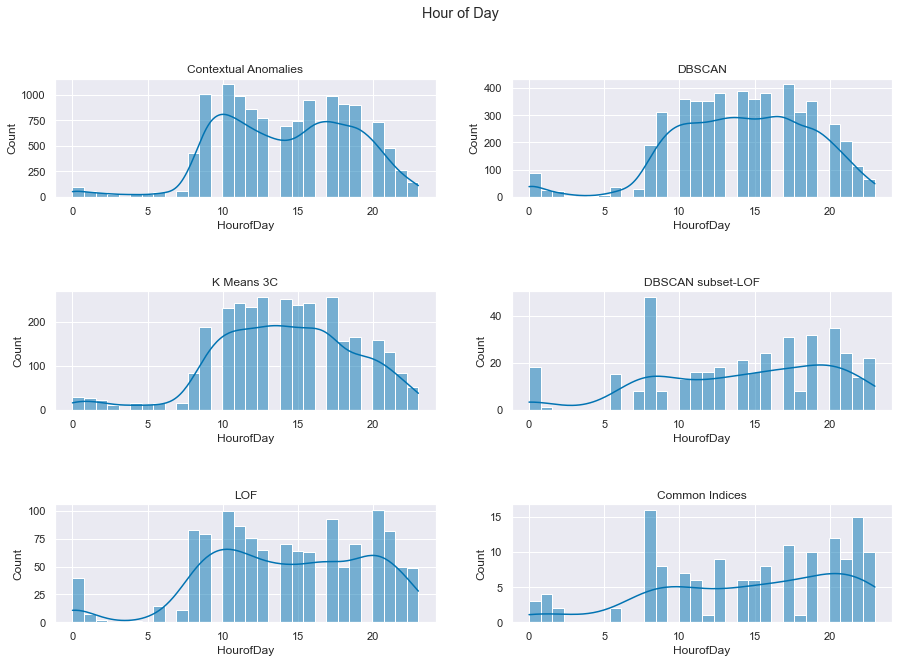

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharey=False)
fig.suptitle('Hour of Day')
plt.subplots_adjust(hspace = 0.8)

sns.histplot(ax=axes[0,0], data=df_anomalous, x='HourofDay',bins=30,kde=True)
axes[0,0].set_title('Contextual Anomalies')

sns.histplot(ax=axes[0,1],data=df_dbnoise, x='HourofDay', bins=30,kde=True)
axes[0,1].set_title('DBSCAN')

sns.histplot(ax=axes[1,0],data=kmeans_noise,x='HourofDay', bins=30, kde=True)
axes[1,0].set_title('K Means 3C')

sns.histplot(ax=axes[1,1],data=df_dblof_n,x='HourofDay', bins=30, kde=True)
axes[1,1].set_title('DBSCAN subset-LOF')

sns.histplot(ax=axes[2,0],data=df_lof,x='HourofDay', bins=30, kde=True)
axes[2,0].set_title('LOF')

sns.histplot(ax=axes[2,1],data=df_dblof_idx,x='HourofDay',bins=30, kde=True)
axes[2,1].set_title('Common Indices')


Text(0.5, 1.0, 'Common Indices')

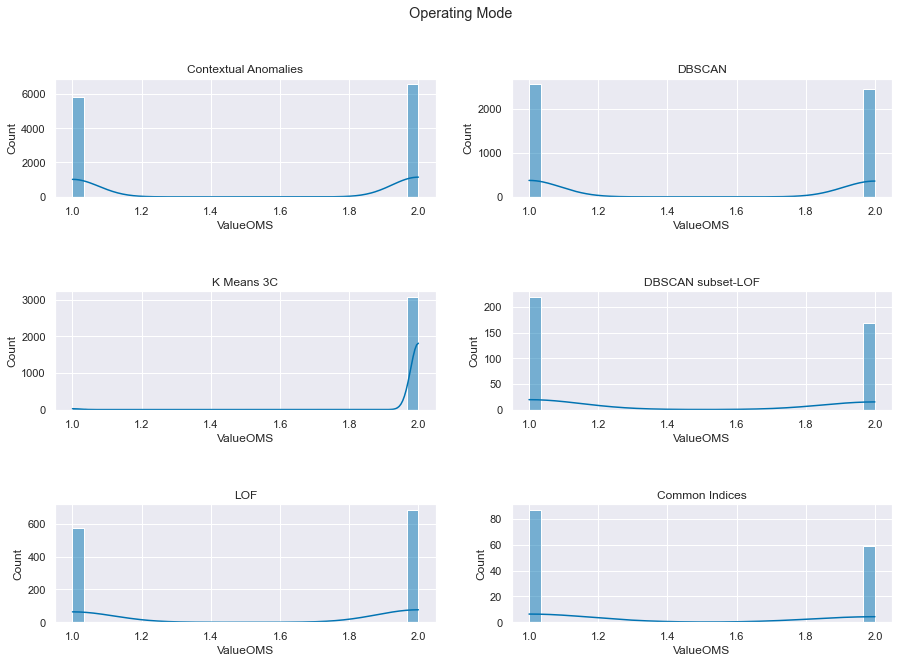

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharey=False)
fig.suptitle('Operating Mode')
plt.subplots_adjust(hspace = 0.8)

sns.histplot(ax=axes[0,0], data=df_anomalous, x='ValueOMS',bins=30,kde=True)
axes[0,0].set_title('Contextual Anomalies')

sns.histplot(ax=axes[0,1],data=df_dbnoise, x='ValueOMS', bins=30,kde=True)
axes[0,1].set_title('DBSCAN')

sns.histplot(ax=axes[1,0],data=kmeans_noise,x='ValueOMS', bins=30, kde=True)
axes[1,0].set_title('K Means 3C')

sns.histplot(ax=axes[1,1],data=df_dblof_n,x='ValueOMS', bins=30, kde=True)
axes[1,1].set_title('DBSCAN subset-LOF')

sns.histplot(ax=axes[2,0],data=df_lof,x='ValueOMS', bins=30, kde=True)
axes[2,0].set_title('LOF')

sns.histplot(ax=axes[2,1],data=df_dblof_idx,x='ValueOMS',bins=30, kde=True)
axes[2,1].set_title('Common Indices')

### Absolute DS Graphs

In [35]:
df= pd.read_csv('final_ds.csv')


In [36]:
len(df)

16958

In [37]:
df['TimeOMS']=df['TimeOMS'].apply(lambda x: dt(x))

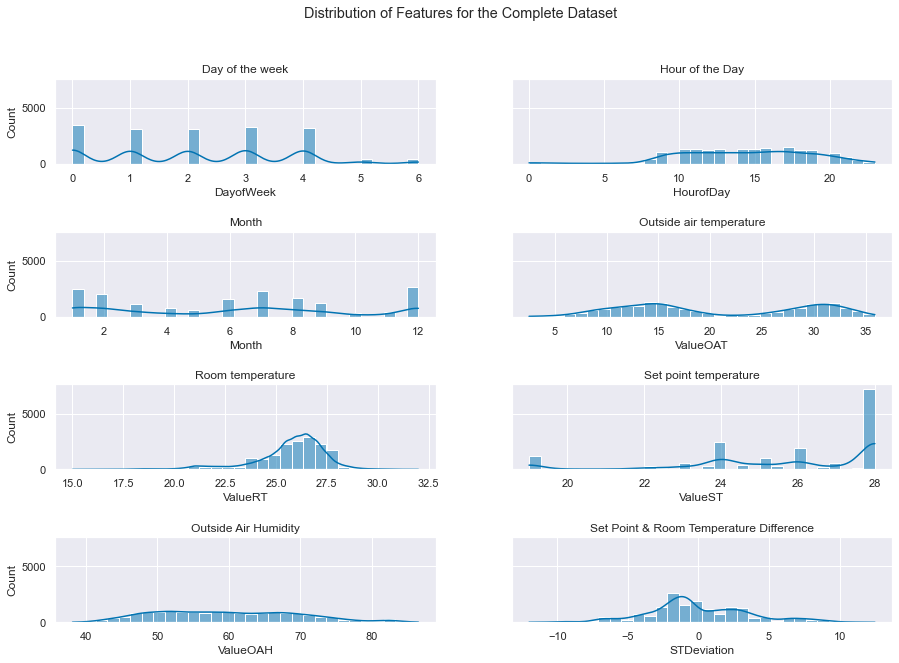

In [38]:
histplt(df, 'Distribution of Features for the Complete Dataset')

In [39]:
df['DayofWeek'].value_counts()

0.0    3426
3.0    3279
4.0    3206
1.0    3129
2.0    3113
5.0     405
6.0     400
Name: DayofWeek, dtype: int64

In [40]:
df['ValueST'].value_counts()

28.0    7240
24.0    2497
26.0    1876
19.0    1205
25.0    1037
27.0     615
23.0     534
24.5     380
22.0     314
25.5     312
23.5     274
26.5     195
22.5     158
27.5      93
20.0      93
21.0      76
21.5      34
20.5      25
Name: ValueST, dtype: int64

<AxesSubplot:xlabel='ValueRT', ylabel='Count'>

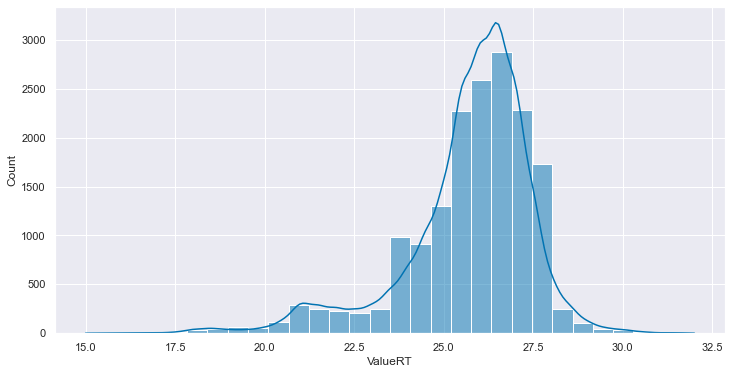

In [41]:
sns.histplot(data=df, x='ValueRT',kde=True, bins=30)

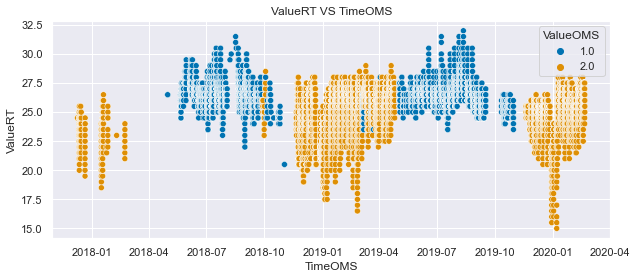

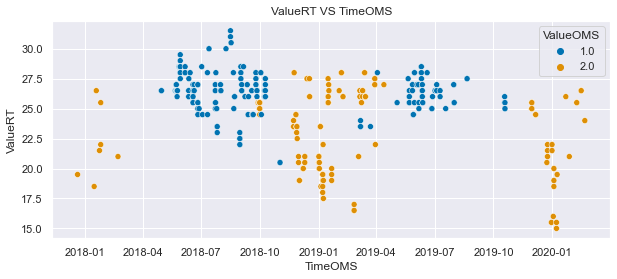

In [42]:
scatterplt(df, 'TimeOMS', 'ValueRT', 'ValueOMS')

scatterplt(df_dblof_n, 'TimeOMS', 'ValueRT', 'ValueOMS')

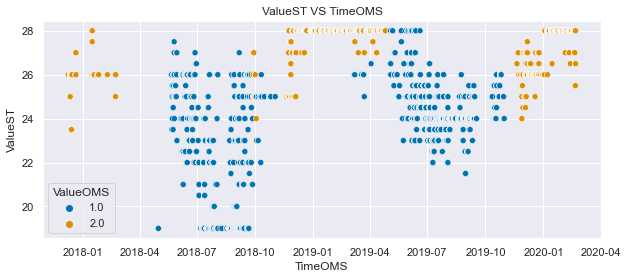

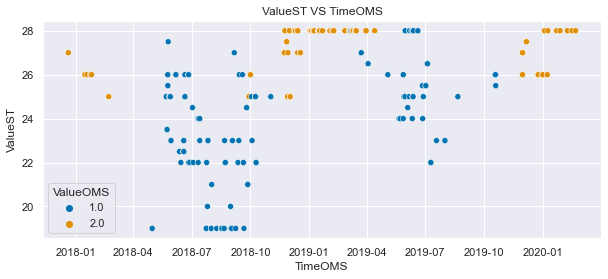

In [43]:
scatterplt(df, 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(df_dblof_n, 'TimeOMS', 'ValueST', 'ValueOMS')

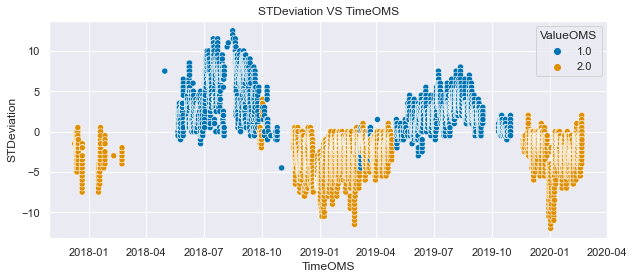

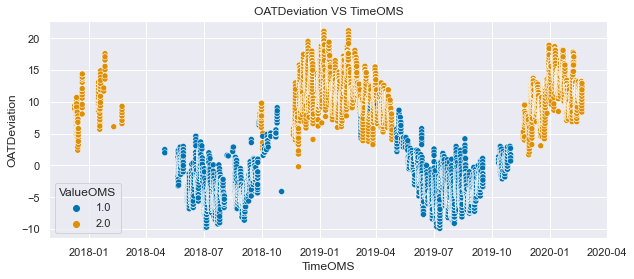

In [44]:
scatterplt(df, 'TimeOMS', 'STDeviation', 'ValueOMS')

scatterplt(df, 'TimeOMS', 'OATDeviation', 'ValueOMS')

In [45]:
df.describe()

,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season
count,16958.000000,16958.0,16958.000000,16958.000000,16955.000000,16958.000000,16958.000000,16958.000000,16955.000000,16957.000000,16958.000000,16958.000000,16958.000000,16958.000000,16958.000000
mean,1.550065,1.0,25.689851,25.694274,20.698850,0.728506,-0.004423,0.072355,4.990947,59.832763,14.469395,6.140524,2018.793431,2.148897,2.808114
std,0.497502,0.0,1.800710,2.653794,8.919982,0.444744,3.608385,0.259083,8.172984,9.802376,4.244125,3.734496,0.637960,1.585097,1.130866
min,1.000000,1.0,15.000000,19.000000,2.500000,0.000000,-12.000000,0.000000,-9.900000,38.130000,0.000000,1.000000,2017.000000,0.000000,1.000000
25%,1.000000,1.0,25.000000,24.000000,13.100000,0.000000,-2.000000,0.000000,-3.500000,51.780000,11.000000,2.000000,2018.000000,1.000000,2.000000
50%,2.000000,1.0,26.000000,26.000000,17.600000,1.000000,-0.500000,0.000000,7.800000,59.125000,15.000000,7.000000,2019.000000,2.000000,3.000000
75%,2.000000,1.0,27.000000,28.000000,29.900000,1.000000,2.500000,0.000000,11.900000,67.315000,18.000000,9.000000,2019.000000,3.000000,4.000000
max,2.000000,1.0,32.000000,28.000000,35.900000,1.000000,12.500000,1.000000,21.200000,86.555000,23.000000,12.000000,2020.000000,6.000000,4.000000


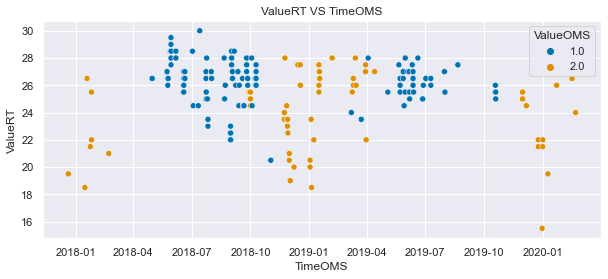

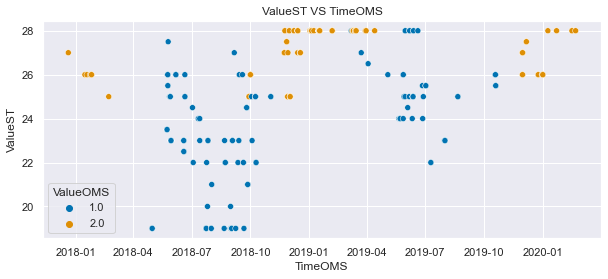

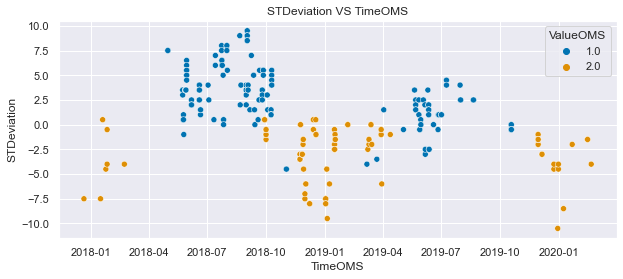

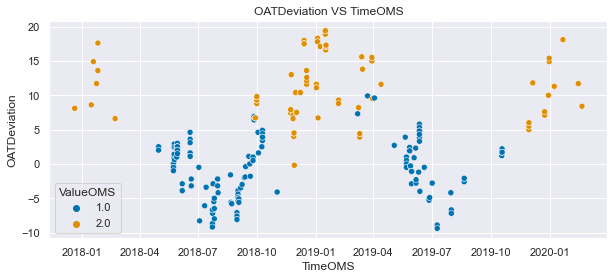

In [46]:
scatterplt(df_dblof_n[df_dblof_n['HourofDay']>8], 'TimeOMS', 'ValueRT', 'ValueOMS')

scatterplt(df_dblof_n[df_dblof_n['HourofDay']>8], 'TimeOMS', 'ValueST', 'ValueOMS')

scatterplt(df_dblof_n[df_dblof_n['HourofDay']>8], 'TimeOMS', 'STDeviation', 'ValueOMS')

scatterplt(df_dblof_n[df_dblof_n['HourofDay']>8], 'TimeOMS', 'OATDeviation', 'ValueOMS')